In [15]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [112]:
start_plot = True
frq_min = 0.3/(6*np.pi) 
frq_max = 0.6/(6*np.pi)
wvl_max = 1/frq_min
wvl_min = 1/frq_max
nfreq = 100
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1

In [113]:
dpml = np.floor(0.5*wvl_max)+1

dA = 2
dB = 3
epsilonA = 12
epsilonB = 3

NAB = 15

sz = 4*dpml+(dA+dB)*NAB

resolution = 100 # pixels/μm

freg_p = 0.1
cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]

In [114]:
def BlockAB(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
    geometry = geometry.tolist()
    return geometry

In [115]:
def BlockBA(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
    geometry = geometry.tolist()
    return geometry

In [116]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=-0.5*sz+dpml),
                     size=mp.Vector3())]

In [117]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=1,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA+dB)*NAB/2+freg_p))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [118]:
pt = mp.Vector3(z=(dA+dB)*NAB/2+freg_p)
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00191092 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 203 with resolution 100
time for set_epsilon = 0.021817 s
-----------
field decay(t = 150.01500000000001): 2.2574074951604276e-09 / 2.2574074951604276e-09 = 1.0
field decay(t = 200.02): 6.345475827092706e-07 / 6.345475827092706e-07 = 1.0
field decay(t = 250.025): 7.285344054306381e-05 / 7.285344054306381e-05 = 1.0
field decay(t = 300.03000000000003): 0.005437606859903525 / 0.005437606859903525 = 1.0
on time step 62050 (time=310.25), 6.44645e-05 s/step
field decay(t = 350.035): 0.04563389454240209 / 0.04563389454240209 = 1.0
field decay(t = 400.04): 0.22203281876013473 / 0.22203281876013473 = 1.0
field decay(t = 450.045): 0.2500001187418567 / 0.2500001187418567 = 1.0
field decay(t = 500.05): 0.16342394253374493 / 0.2500001187418567 = 0.6536954596509293
field decay(t = 550.0550000000001): 0.04563395199981442 / 0.2500001187418567 = 0.18253572130073584


In [119]:
vac_flux = mp.get_fluxes(tran)

In [120]:
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    geometry=BlockAB(NAB,0))
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA+dB)*NAB/2+freg_p))
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [121]:
pt = mp.Vector3(z=(dA+dB)*NAB/2+freg_p)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00226998 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 203 with resolution 100
     block, center = (0,0,-36.5)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-34)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-31.5)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,-29)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,-26.5)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (

In [122]:
if start_plot:
    wl=[]
    Ts=[]

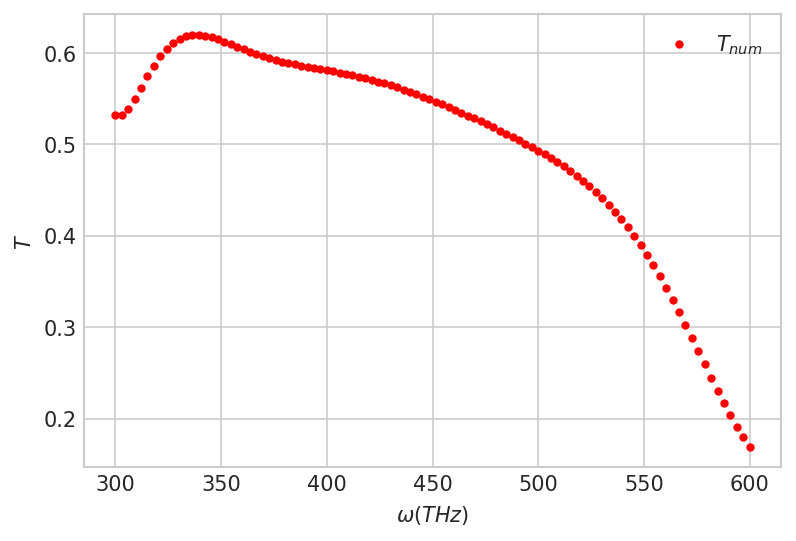

In [123]:
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)
for i in range(nfreq):
    wl = np.append(wl, 2*flux_freqs[i]*np.pi*3*10**3)
    Ts = np.append(Ts,tran_flux[i]/vac_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.style.use('seaborn-whitegrid')
    plt.plot(wl,Ts,'r.',label='$T_{num}$')
    plt.xlabel(r'$\omega(THz)$')
    plt.ylabel('$T$')
    plt.legend(loc="upper right")
    plt.savefig('Tasks_2_3.png')
    plt.show()    